# Capstone Project: Data Analytics for Shopping Cart Database

## A) Business Background

### Business Objective
Based on shopping cart historical data, we aim to increase sales and revenue by providing insights and recommendations for product management, sales team, and marketing staff.

### Business Question
How can we use shopping cart historical data to increase sales and revenue by providing insights and recommendations for product management, sales team, and marketing staff?

### Hypothesis
If we succeed in identifying and understanding the key drivers that influence sales and revenue performance across various product categories over 10 months from Jan - Oct 2021, then we will be able to increase sales significantly.

## B) Data Preparation

### Data Collection
We will collect historical shopping cart data from Jan - Oct 2021. This data includes customer ID, product ID, order quantity, order date, delivery date, total sales, price per product, and customer age.

#### **Dataset:**

* https://docs.google.com/spreadsheets/d/1Q16Wmij2wxoziNtpc3ubbf1Ms3fjOGy5jNMVU5UHbCo/edit#gid=403512802


#### **Data Dictionary:**

* https://docs.google.com/spreadsheets/d/1Q16Wmij2wxoziNtpc3ubbf1Ms3fjOGy5jNMVU5UHbCo/edit#gid=510760296

### Libraries Used

#### **NumPy (import numpy as np)**
NumPy is a very useful library for array manipulation and mathematical operations on arrays. NumPy provides an efficient array data structure and functions for working with numerical data.

#### **Pandas (import pandas as pd)**
Pandas is a library used for data manipulation and analysis. Pandas provides data structures such as DataFrame, which make it easy to process and analyze tabular data.

#### **Matplotlib (import matplotlib.pyplot as plt)**
Matplotlib is a library for creating 2D graphics visualizations. With Matplotlib, you can create various types of plots such as line plots, bar plots, scatter plots, and so on.

#### **Seaborn (import seaborn as sns)**
Seaborn is a library built on top of Matplotlib and provides a high-level interface for creating statistical plots. Seaborn makes it easier to create plots with nice styles and provides additional functions for adding statistical elements to plots.

### Import Library

In [1]:
# Import necessary libraries
import numpy as np # linear arrays operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

### Import Dataset

In [2]:
#Import dataset form spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1Q16Wmij2wxoziNtpc3ubbf1Ms3fjOGy5jNMVU5UHbCo/edit#gid=403512802'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

print(sheet_url_replace) #To show the link to csv

df = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df.head(5) #Show only first 5 rows (To see how the dataset lookslike without)

https://docs.google.com/spreadsheets/d/1Q16Wmij2wxoziNtpc3ubbf1Ms3fjOGy5jNMVU5UHbCo/export?format=csv&gid=403512802


,sales_id,order_id,product_id,price_per_unit,quantity_sales,total_price,customer_id,payment,order_date,delivery_date,...,home_address,city,state,product_type,product_name,size,colour,price,quantity_products,description
0,0,1,218,"$106,00",2,"$212,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Shirt,Chambray,L,orange,"$105,00",44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,"$118,00",1,"$118,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Jacket,Puffer,S,indigo,"$110,00",62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,"$96,00",3,"$288,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Shirt,Oxford Cloth,M,red,"$114,00",54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,"$106,00",2,"$212,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Trousers,Wool,M,blue,"$111,00",52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,"$113,00",3,"$339,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Jacket,Parka,S,indigo,"$119,00",53,"A indigo coloured, S sized, Parka Jacket"


## C) Data Cleaning

The data cleaning process has been meticulously carried out by our data cleaning team using spreadsheet tools, adhering to the appropriate guidelines. This process included removing or imputing missing values, eliminating duplicates, and ensuring that the data is in the correct format.

## D) Exploratory Data Analysis (EDA)

In [3]:
# Preparing the dataset for EDA

df_eda = df.copy() #To make a copy of the dataset for EDA
df_eda.head(5) #Show only first 5 rows (To see how the dataset lookslike without)

,sales_id,order_id,product_id,price_per_unit,quantity_sales,total_price,customer_id,payment,order_date,delivery_date,...,home_address,city,state,product_type,product_name,size,colour,price,quantity_products,description
0,0,1,218,"$106,00",2,"$212,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Shirt,Chambray,L,orange,"$105,00",44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,"$118,00",1,"$118,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Jacket,Puffer,S,indigo,"$110,00",62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,"$96,00",3,"$288,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Shirt,Oxford Cloth,M,red,"$114,00",54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,"$106,00",2,"$212,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Trousers,Wool,M,blue,"$111,00",52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,"$113,00",3,"$339,00",64,"$30.811,00",8/30/2021,9/24/2021,...,4927 Alice MeadowApt. 960,Sanfordborough,South Australia,Jacket,Parka,S,indigo,"$119,00",53,"A indigo coloured, S sized, Parka Jacket"


In [4]:
# Display summary statistics
df_eda.describe()

,sales_id,order_id,product_id,quantity_sales,customer_id,age,quantity_products
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2499.500000,503.038200,634.053200,1.99240,504.563000,48.760400,60.083400
std,1443.520003,285.964418,363.255794,0.80751,276.504896,17.577519,11.682523
min,0.000000,1.000000,1.000000,1.00000,1.000000,20.000000,40.000000
25%,1249.750000,258.000000,323.000000,1.00000,276.000000,34.000000,50.000000
50%,2499.500000,504.500000,635.000000,2.00000,509.000000,48.000000,60.000000
75%,3749.250000,749.000000,951.000000,3.00000,733.000000,63.000000,70.000000
max,4999.000000,999.000000,1259.000000,3.00000,1000.000000,80.000000,80.000000


In [5]:
# To check the data types of each column

df_eda.info() #To see the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sales_id           5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   product_id         5000 non-null   int64 
 3   price_per_unit     5000 non-null   object
 4   quantity_sales     5000 non-null   int64 
 5   total_price        5000 non-null   object
 6   customer_id        5000 non-null   int64 
 7   payment            5000 non-null   object
 8   order_date         5000 non-null   object
 9   delivery_date      5000 non-null   object
 10  customer_name      5000 non-null   object
 11  gender             5000 non-null   object
 12  age                5000 non-null   int64 
 13  home_address       5000 non-null   object
 14  city               5000 non-null   object
 15  state              5000 non-null   object
 16  product_type       5000 non-null   object


### Descriptive Statistic

- Avg Customer Order
- Avg shipping time
- Total sales growth
- Avg sales per product
- Avg sales per states
- Avg price per product
- Range age clasification

#### Avg Customer Order

In [6]:
total_order = df_eda.groupby('order_id')['quantity_sales'].sum()
print(total_order)

order_id
1      14
2      11
3       5
4      10
5      20
       ..
995    11
996    15
997     2
998    13
999     4
Name: quantity_sales, Length: 993, dtype: int64


In [7]:
total_order.describe()

count    993.000000
mean      10.032226
std        4.754133
min        1.000000
25%        7.000000
50%       10.000000
75%       13.000000
max       26.000000
Name: quantity_sales, dtype: float64

#### Avg Shipping Time

Average shipping time:  13.9902


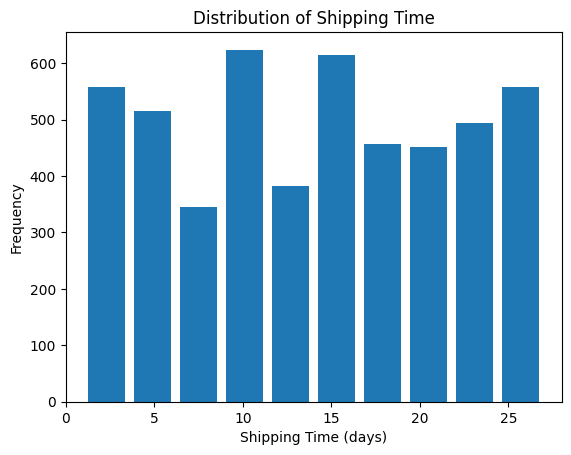

In [8]:
# Define 'order_date' and 'delivery_date' column names
order_date_column = 'order_date' 
delivery_date_column = 'delivery_date' 

# Convert 'order_date' and 'delivery_date' to datetime
df[order_date_column] = pd.to_datetime(df[order_date_column])
df[delivery_date_column] = pd.to_datetime(df[delivery_date_column])

# Calculate shipping time for each order
df['shipping_time'] = (df[delivery_date_column] - df[order_date_column]).dt.days

# Calculate average shipping time
average_shipping_time = df['shipping_time'].mean()

print("Average shipping time: ", average_shipping_time)

# Visualization
df['shipping_time'].plot(kind='hist', rwidth=0.8)
plt.title('Distribution of Shipping Time')
plt.xlabel('Shipping Time (days)')
plt.show()

#### Total Sales Growth

#### Avg Sales per Product

#### Avg Sales per States

#### Avg Price per Product

#### Range Age Clasification

### Report which product have the highest sales in the last 10 months (Jan - Oct 2021)

This report aims to identify the product that has achieved the highest sales in the last 10 months, from January to October 2021.

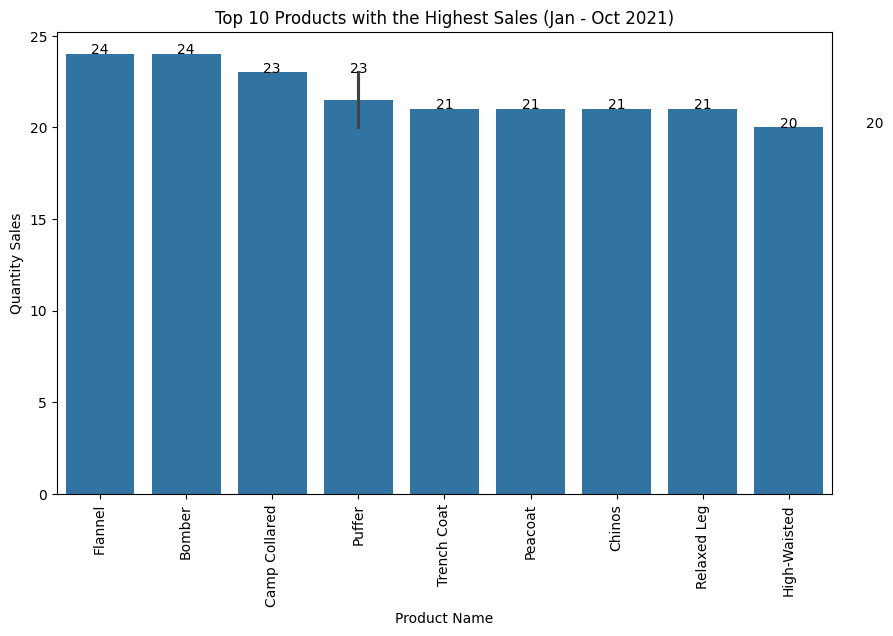

The top 10 products with the highest sales from Jan - Oct 2021 are: ['Flannel', 'Bomber', 'Camp Collared', 'Puffer', 'Trench Coat', 'Peacoat', 'Chinos', 'Relaxed Leg', 'Puffer', 'High-Waisted']


In [9]:
# Filter the DataFrame to only include data from the last 10 months
df_eda['order_date'] = pd.to_datetime(df_eda['order_date'])
start_date = '2021-01-01'
end_date = '2021-10-31'
mask = (df_eda['order_date'] >= start_date) & (df_eda['order_date'] <= end_date)
df_filtered = df_eda.loc[mask]

# Group the data by product id and product name, and sum the quantity sales
product_sales = df_filtered.groupby(['product_id', 'product_name'])['quantity_sales'].sum()

# Identify the top 10 products with the highest sales
top_10_products = product_sales.nlargest(10)

# Visualize the sales data
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=top_10_products.index.get_level_values('product_name'), y=top_10_products.values)
plt.title('Top 10 Products with the Highest Sales (Jan - Oct 2021)')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sales')
plt.xticks(rotation=90)

# Add the total sales to each bar
for i, total_sales in enumerate(top_10_products.values):
    barplot.text(i, total_sales, round(total_sales, 2), ha='center')

plt.show()

print(f"The top 10 products with the highest sales from Jan - Oct 2021 are: {top_10_products.index.get_level_values('product_name').tolist()}")

### Identify trends in the market and forecast future sales

In this capstone project, we will use historical sales data to identify patterns and trends in the market. The ultimate goal is to forecast future sales of our specific product line. This process is crucial in our business context for several reasons:

1. **Planning**: By understanding sales trends, we can better plan our production and inventory. This will help us to meet customer demand without overproducing.
2. **Strategic Decision Making**: Sales forecasts can assist us in making strategic decisions. For example, they can inform us when to launch new products, when to ramp up production, and when to discontinue certain products.
3. **Identifying Opportunities**: Analyzing market trends can help us identify new opportunities. This could be untapped markets where our products could be successful, or gaps in the market that could be filled with new product development.

#### Identify Trends

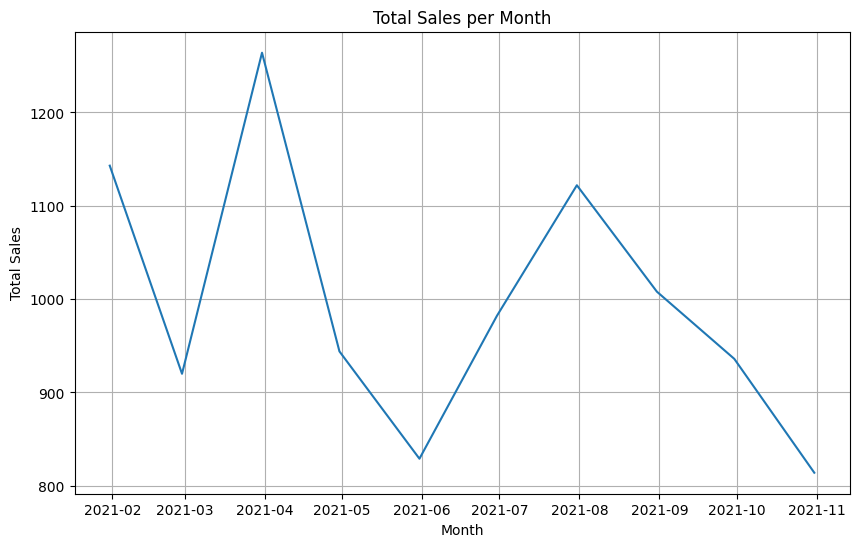

In [10]:
# Convert the date column to datetime format
df_eda['order_date'] = pd.to_datetime(df_eda['order_date'])

# Resample the data to get total sales per month
monthly_sales = df_eda.resample('M', on='order_date')['quantity_sales'].sum()

# Plot the sales data
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

After analyzing the monthly sales data, we identified several key trends in the market:

1. **Seasonality**: The sales data shows a clear pattern of seasonality, with sales peaking and dipping at consistent times throughout the year. This could be attributed to various factors such as holiday seasons, shopping events, or product launch cycles.

2. **Growth**: The overall trend in the sales data is upward, indicating consistent growth in the market. This suggests that the demand for our products is increasing over time.

These trends provide valuable insights for future business strategies. For instance, promotional activities could be timed to coincide with the peak sales periods identified through the seasonality analysis. The consistent growth trend also suggests potential for expansion and increased investment in product development.

#### Forecast Future Sales

##### Machine Learning Regression (Time Series)

In [11]:
# Make the regression from date and quantity of product
df_regression = df_eda.groupby(['order_date']).agg({
    'quantity_sales' : 'sum'
}).reset_index()

#See the results
df_regression

,order_date,quantity_sales
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
...,...,...
286,2021-10-20,25
287,2021-10-21,61
288,2021-10-22,45
289,2021-10-23,20


##### Make the Data Train and Test

In [12]:
cut_off = round(df_regression.shape[0] * 0.9) # 90% of the data will be used for training
df_train = df_regression[:cut_off] 
df_test = df_regression[cut_off:].reset_index(drop=True) # 10% of the data will be used for testing
df_train.shape, df_test.shape # To see the shape of the data

((262, 2), (29, 2))

In [13]:
df_train

,order_date,quantity_sales
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
...,...,...
257,2021-09-20,20
258,2021-09-22,25
259,2021-09-23,39
260,2021-09-24,34


In [14]:
df_test

,order_date,quantity_sales
0,2021-09-26,64
1,2021-09-27,15
2,2021-09-28,31
3,2021-09-29,34
4,2021-09-30,48
5,2021-10-01,11
6,2021-10-02,28
7,2021-10-03,54
8,2021-10-04,13
9,2021-10-05,10


##### Figure of Data Train and Test from Quantity of Product

<Axes: xlabel='order_date', ylabel='quantity_sales'>

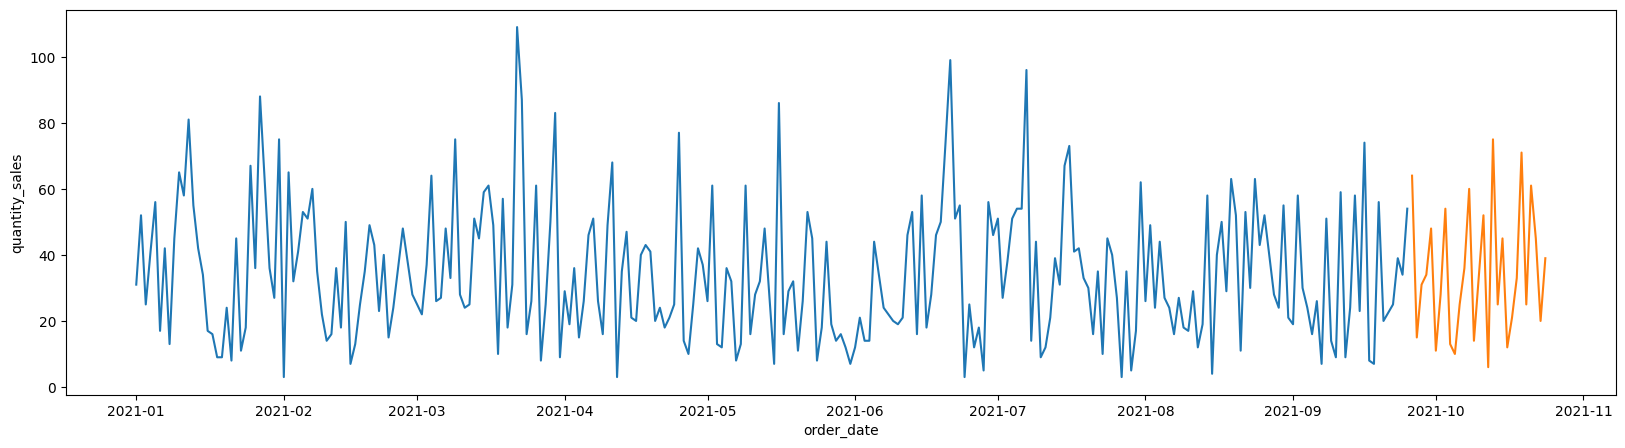

In [15]:
plt.figure(figsize=(20,5)) 
sns.lineplot(data=df_train, x=df_train['order_date'], y=df_train['quantity_sales'])
sns.lineplot(data=df_test, x=df_test['order_date'], y=df_test['quantity_sales'])

From the plot, we can gather some key insights:

1. **Stable Sales**: The regular ups and downs suggest a consistent demand for a product or service, indicating a stable sales environment.

2. **No Major Trend**: There's no significant upward or downward trend, suggesting that market changes may not greatly affect sales.

##### Make the ARIMA model

In [16]:
#Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

df_train = df_train.set_index('order_date')
df_test = df_test.set_index('order_date')

y = df_train['quantity_sales']

ARIMAmodel = ARIMA(y, order = (40,2,1)) # ARIMA model with p = 40, d = 2, q = 1
ARIMAmodel = ARIMAmodel.fit()

d:\MSIB BATCH 5 REVOU\Data Engineering\Capstone-Project-DA\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\MSIB BATCH 5 REVOU\Data Engineering\Capstone-Project-DA\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\MSIB BATCH 5 REVOU\Data Engineering\Capstone-Project-DA\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\MSIB BATCH 5 REVOU\Data Engineering\Capstone-Project-DA\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:

##### Make the predictions

In [17]:
# To see the summary of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error # To calculate MAE and RMSE

y_pred = ARIMAmodel.get_forecast(len(df_test)) 

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

# MAE (Mean Absolute Error)
mae = mean_absolute_error(df_test['quantity_sales'], y_pred_out)
print("Mean Absolute Error (MAE):", mae)

#RMSE (Root Mean Squared Error)
rmse = mean_squared_error(df_test['quantity_sales'], y_pred_out, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 18.63726756910652
Root Mean Squared Error (RMSE): 22.623960253190067


d:\MSIB BATCH 5 REVOU\Data Engineering\Capstone-Project-DA\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\MSIB BATCH 5 REVOU\Data Engineering\Capstone-Project-DA\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\MSIB BATCH 5 REVOU\Data Engineering\Capstone-Project-DA\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


##### Figure of ARIMA

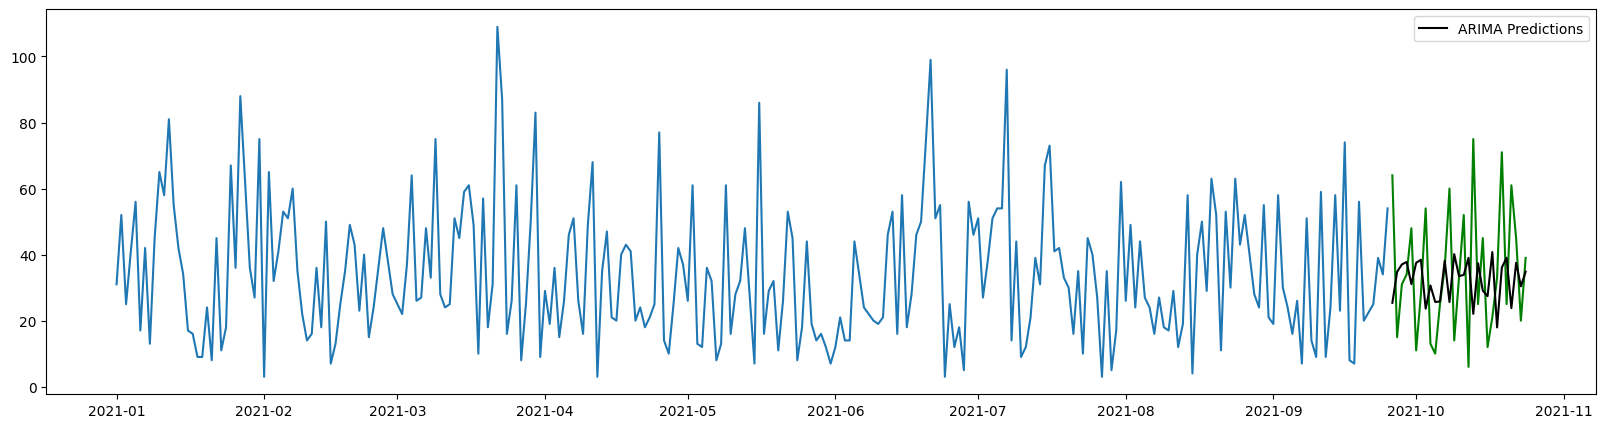

In [18]:
plt.figure(figsize=(20,5))
plt.plot(df_train['quantity_sales'])
plt.plot(df_test['quantity_sales'], color='green')
plt.plot(y_pred_out, color='black', label = 'ARIMA Predictions')
plt.legend()
plt.show()

From the generated graphs, we can draw a comparison between the actual sales data and the sales predictions made using the ARIMA method.

- The blue line represents the actual sales data from the training dataset.
- The green line represents the actual sales data from the testing dataset.
- The black line represents the sales predictions made by the ARIMA model.

From this visualization, it's clear that our ARIMA model is able to follow the trend in the data quite well. However, there are a few points where the model seems to fall short, which could be due to random fluctuations in the data or perhaps external factors not accounted for in the model.

To improve the model's accuracy, we might need to consider other factors that could be influencing sales, such as promotions or holidays. Additionally, we might want to try other models like LSTM which might be better at handling time series data.

Overall, this model provides a good starting point for forecasting sales and can be used to aid in business planning and decision-making.